In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning - Deep Belief Network (DBN)

DBN (Deep Belief Network) ou Rede de Crença Profunda é um tipo de arquitetura de rede neural artificial que consiste em múltiplas camadas de unidades de processamento. Essas unidades podem ser neurônios artificiais ou unidades de ativação que funcionam de maneira análoga aos neurônios biológicos.

O conceito central por trás das DBNs é a ideia de modelar hierarquias de características complexas presentes nos dados. Cada camada da rede é treinada de forma não supervisionada para aprender representações das características dos dados de entrada. A primeira camada, chamada de camada visível, recebe os dados brutos como entrada. À medida que você avança nas camadas, a complexidade das características aprendidas aumenta, capturando padrões mais abstratos e de alto nível.

As DBNs usam a aprendizagem profunda, que se refere à aprendizagem em várias camadas de representações hierárquicas. Elas são compostas por duas partes principais: a etapa de treinamento não supervisionado e a etapa de ajuste supervisionado.

Treinamento não supervisionado: Nessa etapa, as camadas são treinadas usando uma técnica chamada Restricted Boltzmann Machines (RBMs). As RBMs são modelos probabilísticos que buscam aprender uma distribuição de probabilidade dos dados de entrada. Cada RBM treina uma camada da rede para reconhecer padrões específicos e aprender representações intermediárias dos dados.

Ajuste supervisionado: Após o treinamento não supervisionado, a DBN pode ser ajustada para tarefas específicas usando um processo supervisionado. Isso envolve a introdução de camadas adicionais e treinamento usando um algoritmo de retropropagação, semelhante ao usado em redes neurais convencionais.

As DBNs têm sido usadas em várias aplicações, como reconhecimento de fala, processamento de linguagem natural, reconhecimento de padrões em imagens, entre outros. No entanto, elas também têm algumas limitações, como a complexidade do treinamento e a sensibilidade aos hiperparâmetros.

Em Resumo as DBNs são o empilhamento das RBMs

Referência: https://saturncloud.io/blog/how-to-create-a-deep-belief-network-with-stacked-rbms-using-scikitlearn/ <br>
Referência: https://stackoverflow.com/questions/52166308/stacking-rbms-to-create-deep-belief-network-in-sklearn

Referência Teórica: https://www.analyticsvidhya.com/blog/2022/03/an-overview-of-deep-belief-network-dbn-in-deep-learning/

## Base MNIST

A base contém 60 mil imagens com as dimensões 28x28 = 784 pixels

In [2]:
import random
random.seed(0)

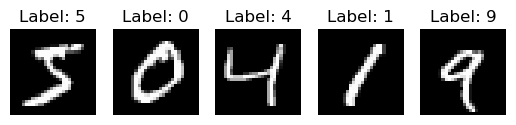

In [3]:
from tensorflow.keras.datasets import mnist  # Importa a base de dados MNIST do TensorFlow
from sklearn.datasets import fetch_openml

# Carrega os dados de treinamento e teste da base MNIST
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#mnist = fetch_openml('mnist_784', parser='auto')
#X, y = mnist.data, mnist.target

# Exibe as primeiras 5 imagens da base de treinamento
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_X[i], cmap='gray')
    plt.title(f"Label: {train_y[i]}")
    plt.axis('off')

plt.show()

## Tratando a Base

A função Bernoulli RBM considera que as colunas das features estejam entre [0,1], a base MNIST está em uma escala entre [0,255].

Precisamos ajustar a escala

In [22]:
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

In [ ]:
#X_train = scale(train_X)
#X_test = scale(test_X)

Redimensiona para o formato exigido pelo modelo (duas dimensões) 

1a Observaçoes (imagens) <br>
2a Pixels (28x28 = 784)

In [4]:
X_train = train_X.reshape(-1, 784) / 255.0
X_test = test_X.reshape(-1, 784) / 255.0

In [5]:
X_train.shape

(60000, 784)

In [ ]:
#y_train = tf.keras.utils.to_categorical(train_y)
#y_test = tf.keras.utils.to_categorical(test_y)

In [6]:
train_y.shape

(60000,)

# Construindo DBN usando Tensor Flow

Referência: https://spotintelligence.com/2023/02/10/deep-belief-network/

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
# Build the DBN
input_layer = Input(shape=(784,))
hidden_layer_1 = Dense(100, activation='relu')(input_layer)
hidden_layer_2 = Dense(100, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(100, activation='relu')(hidden_layer_2)

output_layer = Dense(10, activation='softmax')(hidden_layer_3)

model_ts = Model(input_layer, output_layer)

In [9]:
# Compile the model
model_ts.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
model_ts.fit(X_train, train_y, epochs=10, validation_data=(X_test, test_y))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2378 - accuracy: 0.9289 - val_loss: 0.1552 - val_accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1026 - accuracy: 0.9687 - val_loss: 0.1081 - val_accuracy: 0.9695
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0744 - accuracy: 0.9772 - val_loss: 0.1202 - val_accuracy: 0.9645
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0846 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0750 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0376 - accuracy: 0.9875 - val_loss: 0.0968 - val_accuracy:

In [12]:
# Evaluate the model
test_loss, test_acc = model_ts.evaluate(X_test, test_y)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 684us/step - loss: 0.1056 - accuracy: 0.9737
Test accuracy: 0.9736999869346619


In [14]:
reconstructed_images = model_ts.predict(X_test)

313/313 [==============================] - 0s 610us/step


In [20]:
n_prediction= 10
for i in range(n_prediction):
    print(f'Real: {test_y[i]} - Modelo: {np.argmax(reconstructed_images[i])}')

Real: 7 - Modelo: 7
Real: 2 - Modelo: 2
Real: 1 - Modelo: 1
Real: 0 - Modelo: 0
Real: 4 - Modelo: 4
Real: 1 - Modelo: 1
Real: 4 - Modelo: 4
Real: 9 - Modelo: 9
Real: 5 - Modelo: 6
Real: 9 - Modelo: 9


### O modelo DBN TS consegue ler os pixels de uma imagem 28x28 e reconhecer qual é o número com 97% de acurácia.

# Construindo modelo DBN usando BernoulliRBM

Referência: https://saturncloud.io/blog/how-to-create-a-deep-belief-network-with-stacked-rbms-using-scikitlearn/

Referência: https://stackoverflow.com/questions/52166308/stacking-rbms-to-create-deep-belief-network-in-sklearn

Referência: https://github.com/eriklindernoren/ML-From-Scratch/blob/master/mlfromscratch/unsupervised_learning/restricted_boltzmann_machine.py

Referência: https://pyimagesearch.com/2014/09/22/getting-started-deep-learning-python/

In [23]:
X_train = scale(train_X).reshape(-1,784)
X_test = scale(test_X).reshape(-1,784)

In [24]:
X_train.shape

(60000, 784)

In [25]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

In [26]:
rbm = BernoulliRBM(n_components=100, 
                   learning_rate=0.01, 
                   n_iter = 10, 
                   batch_size = 10,
                   random_state=0, 
                   verbose=True)

In [37]:
dbn = Pipeline(steps=[('rbm1', clone(rbm)), ('rbm2', clone(rbm)), ('rbm3', clone(rbm)), ('logistic', LogisticRegression())])

In [38]:
# Train the DBN on the data
dbn.fit(X_train, train_y)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -113.21, time = 6.36s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -99.56, time = 7.28s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -93.05, time = 7.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -90.60, time = 7.49s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -86.86, time = 7.52s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -84.15, time = 7.43s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -82.95, time = 7.43s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -81.74, time = 7.46s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -80.59, time = 7.46s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -80.45, time = 7.44s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -35.94, time = 1.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -31.10, time = 1.52s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -28.05, time = 1.53s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -27.24, time = 1.52s
[BernoulliRBM] Iteration 5, pseu

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('rbm1',
                 BernoulliRBM(learning_rate=0.01, n_components=100,
                              random_state=0, verbose=True)),
                ('rbm2',
                 BernoulliRBM(learning_rate=0.01, n_components=100,
                              random_state=0, verbose=True)),
                ('rbm3',
                 BernoulliRBM(learning_rate=0.01, n_components=100,
                              random_state=0, verbose=True)),
                ('logistic', LogisticRegression())])

In [39]:
#print("Training set Pseudo-Likelihood =", dbn.score(X_train, train_y))
#print("Validation set Pseudo-Likelihood =", dbn.score(X_test, test_y))

Training set Pseudo-Likelihood = 0.94325
Validation set Pseudo-Likelihood = 0.9456


In [40]:
result = dbn.predict(X_test)

In [58]:
n_prediction= 10
for i in range(n_prediction):
    print(f'Real: {test_y[i]} - Modelo: {result[i]}')

Real: 7 - Modelo: 7
Real: 2 - Modelo: 2
Real: 1 - Modelo: 1
Real: 0 - Modelo: 0
Real: 4 - Modelo: 4
Real: 1 - Modelo: 1
Real: 4 - Modelo: 4
Real: 9 - Modelo: 9
Real: 5 - Modelo: 5
Real: 9 - Modelo: 9


In [54]:
from sklearn.metrics import classification_report

print("Model performance:\n%s\n" % (
            classification_report(test_y, result)))

Model performance:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.96      0.95      0.95      1032
           3       0.94      0.93      0.93      1010
           4       0.94      0.92      0.93       982
           5       0.94      0.95      0.94       892
           6       0.97      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.91      0.93      0.92       974
           9       0.90      0.91      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000




### O modelo DBN BernoulliRBM consegue ler os pixels de uma imagem 28x28 e reconhecer qual é o número com 95% de acurácia.